In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from numpy.random import randint
import pandas as pd
print("Imported Successfully")

Imported Successfully


In [45]:
def d_oracle(case):
    oracle = QuantumCircuit(2)
    
    # Do the output magic
    oracle.x(1)
    oracle.h(1)
    
    # randomly swap the whole output.
    # this adds a possibility to return one of
    # [f(0) = 0; f(1) = 0] or [f(0) = 1; f(1) = 1]
    # in a constant case.
    if bool(randint(2)):
        oracle.x(1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        oracle.cx(0, 1)
    # Case in which oracle is constant
    if case == "constant":
        pass
    
        
    
    oracle_gate = oracle.to_gate()
    oracle_gate.name = "Phase Oracle" # To show when we display the circuit
    return oracle_gate
    

In [46]:
def d_algorithm(oracle):
    dj_circuit = QuantumCircuit(2, 1)
    
    # input prepare
    dj_circuit.h(0)
    
    dj_circuit.barrier()

    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, [0, 1])
    
    dj_circuit.barrier()
    
    # Finally, perform the H-gate again and measure:
    dj_circuit.h(0)
    dj_circuit.measure(0, 0)
    
    return dj_circuit

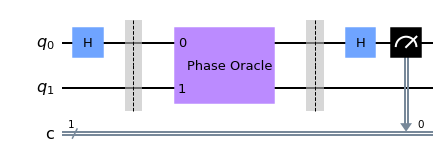

In [54]:
# case = "balanced" if np.random.randint(2) == 0 else "constant"
case = "constant"
oracle_gate = d_oracle(case)
circuit = d_algorithm(oracle_gate)
circuit.draw(output="mpl")

constant


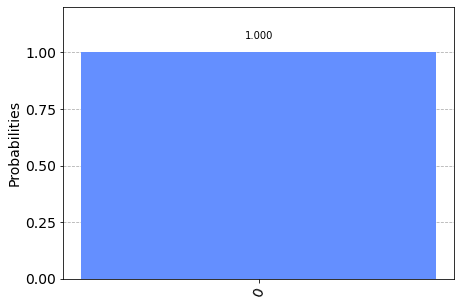

In [55]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(transpile(circuit, aer_sim))
results = aer_sim.run(qobj).result()
answer = results.get_counts()

print(case)
plot_histogram(answer)